In [31]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
import hiive.mdptoolbox as mdptoolbox
from hiive.mdptoolbox import mdp
from gym.envs.toy_text.frozen_lake import generate_random_map
import re

# Using mdptoolbox

In [32]:
# From hiivemdptoolbox lib: https://github.com/hiive/hiivemdptoolbox/blob/master/hiive/mdptoolbox/openai.py
class OpenAI_MDPToolbox:
    def __init__(self, openAI_env_name:str, render:bool=False, **kwargs):
        """Create a new instance of the OpenAI_MDPToolbox class
        :param openAI_env_name: Valid name of an Open AI Gym env 
        :type openAI_env_name: str
        :param render: whether to render the Open AI gym env
        :type rander: boolean 
        """
        self.env_name = openAI_env_name
    
        self.env = gym.make(self.env_name, **kwargs)
        self.env.reset()

        if render:
            self.env.render()
        
        self.transitions = self.env.P
        self.actions = int(re.findall(r'\d+', str(self.env.action_space))[0])
        self.states = int(re.findall(r'\d+', str(self.env.observation_space))[0])
        self.P = np.zeros((self.actions, self.states, self.states))
        self.R = np.zeros((self.states, self.actions))
        self.convert_PR()
        
    def convert_PR(self):
        """Converts the transition probabilities provided by env.P to MDPToolbox-compatible P and R arrays
        """
        for state in range(self.states):
            for action in range(self.actions):
                for i in range(len(self.transitions[state][action])):
                    tran_prob = self.transitions[state][action][i][0]
                    state_ = self.transitions[state][action][i][1]
                    self.R[state][action] += tran_prob*self.transitions[state][action][i][2]
                    self.P[action, state, state_] += tran_prob


def plot_policy(run_map, policy, title):
    size = len(run_map)
    map_direction = {0:'←', 1:'↓', 2:'→', 3:'↑'}
    map_convert = {'S':2, 'F':1, 'H':0, 'G':3}
    
    d_map = np.zeros((size, size), dtype='int')
    for i in range(len(run_map)):
        for j in range(len(run_map)):
            d_map[i, j] = map_convert[run_map[i][j]]

    plt.figure()
    plt.imshow(d_map,cmap ="hot")
    plt.title(title)

    for i in range(size):
        for j in range(size):
            if d_map[i, j] in (0, 3):
                continue
            plt.text(j, i, map_direction[policy[size*i+j]], color='w')
    plt.text(size-1, size-1, 'G', color='blue')
    
state_size = '20x20'
random_map =['SFFFFFFFHFFFFFFFFFHF',
             'HHFFFHFHFFHHFFFHFHFF',
             'FFHFHFFFFFFFHFHFFFFF',
             'FFHFFFFHHHFFHFFFFHHH',
             'FHFFFHHFFFFHFFFHHFFF',
             'FFFFFHFHFFFFFFFHFHFF',
             'HFFFFFFFFFHFFFFFFFFF',
             'FFFFFFFFFFFFFFFFFFFF',
             'FFFFHHFFFFFFFFFFFFFF',
             'FHHFFHFFFHFFFFFFFFFF',
             'FFFFFFFFHFFFFFFFFFHF',
             'HHFFFHFHFFHHFFFHFHFF',
             'FFHFHFFFFFFFHFHFFFFF',
             'FFHFFFFHHHFFHFFFFHHH',
             'FHFFFHHFFFFHFFFHHFFF',
             'FFFFFHFHFFFFFFFHFHFF',
             'HFFFFFFFFFHFFFFFFFFF',
             'FFFFFFFFFFFFFFFFFFFF',
             'FFFFHHFFFFFFFFFFFFFF',
             'FHHFFHFFFHFFFFFFFFFG',
             ]
env = OpenAI_MDPToolbox("FrozenLake-v1", False, desc=random_map, is_slippery=True)
P = env.P
R = env.R



def graph_time(algorithm_model, run_stats):
    plt.figure()
    plt.plot([ i['Time'] for i in run_stats ], marker = '.', color = 'red')
    plt.title(f'Time vs Iteration for {algorithm_model} with world env {state_size}')
    plt.xlabel('Iteration')
    plt.ylabel('Time')
    
def graph_reward(algorithm_model, run_stats):
    plt.figure()
    plt.plot([ i['Reward'] for i in run_stats ], marker = '.', color = 'aqua')
    plt.title(f'Reward vs Iteration for {algorithm_model} with World Env {state_size}')
    plt.xlabel('Iteration')
    plt.ylabel('Reward')

def graph_meanV(algorithm_model, run_stats):
    plt.figure()
    plt.plot([ i['Mean V'] for i in run_stats ], marker = '.', color = 'blue')
    plt.title(f'Mean Value vs Iteration for {algorithm_model} with World Env {state_size}')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Value')

def graph_error(algorithm_model, run_stats):
    plt.figure()
    plt.plot([ i['Error'] for i in run_stats ], marker = '.', color = 'pink')
    plt.title(f'Error vs Iteration for {algorithm_model} with World Env {state_size}')
    plt.xlabel('Iteration')
    plt.ylabel('Error')

# Algorithms Value, Policy and Q-Learning

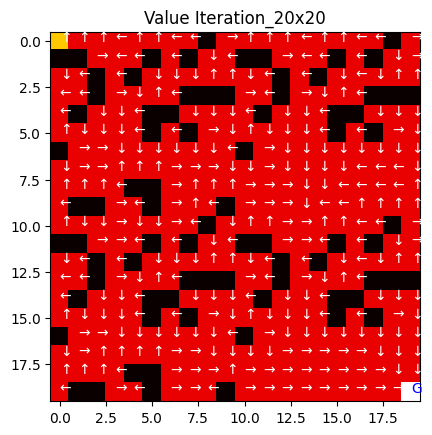

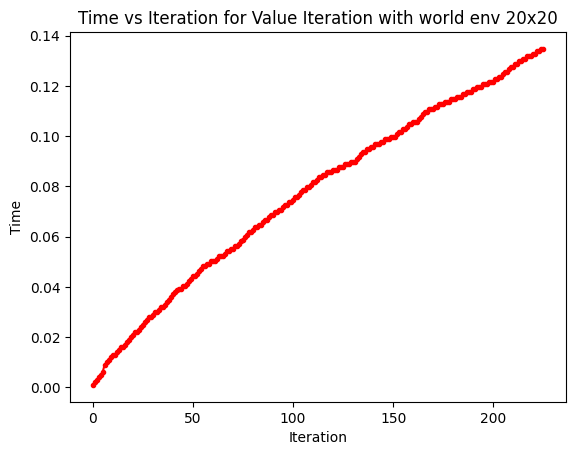

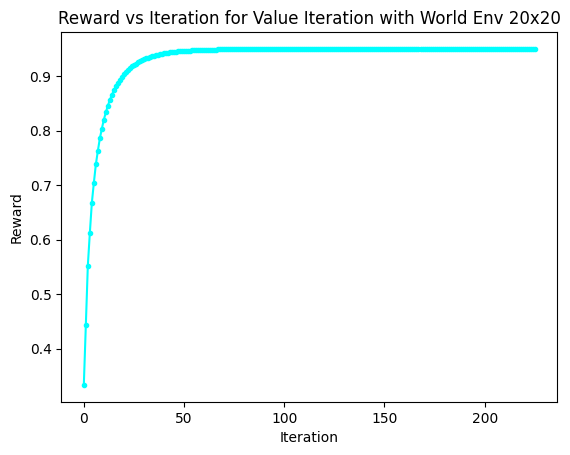

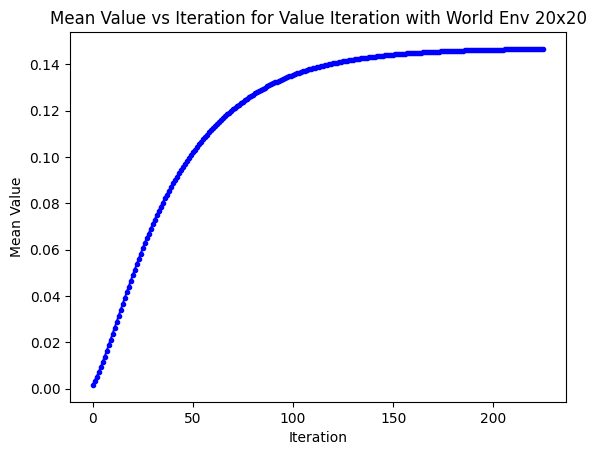

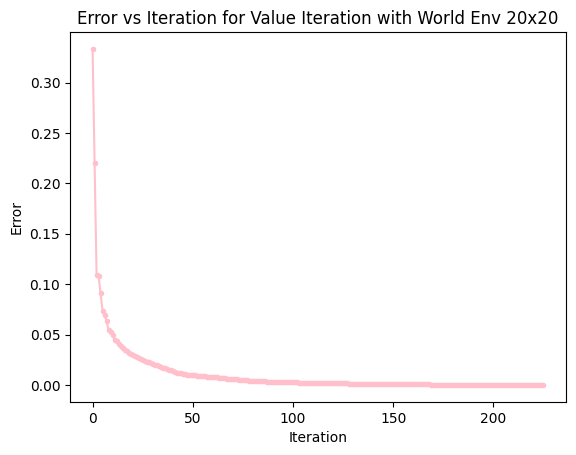

In [33]:
vi = mdp.ValueIteration(P, R, 0.99, max_iter=10000)
vi.run()

plot_policy(random_map, vi.policy, f'Value Iteration_{state_size}')
graph_time("Value Iteration", vi.run_stats)
graph_reward("Value Iteration", vi.run_stats)
graph_meanV("Value Iteration", vi.run_stats)
graph_error("Value Iteration", vi.run_stats)

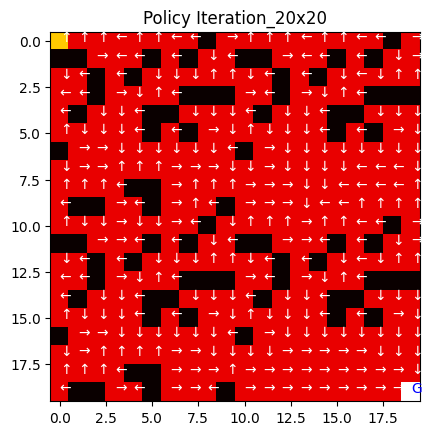

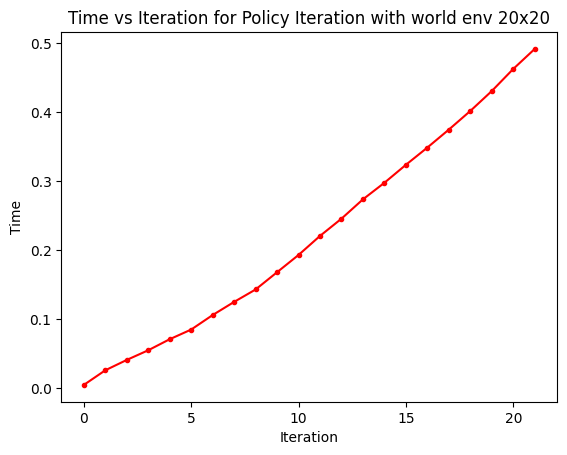

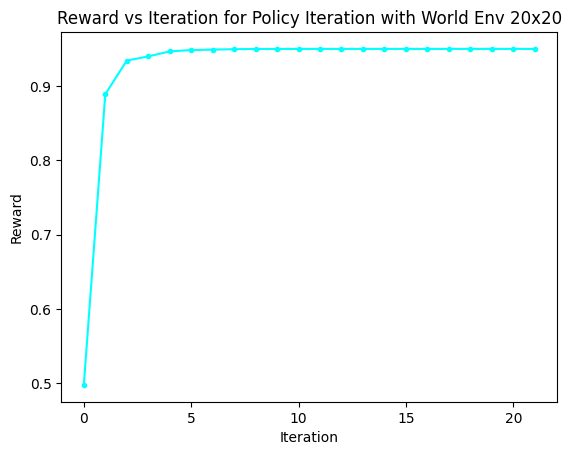

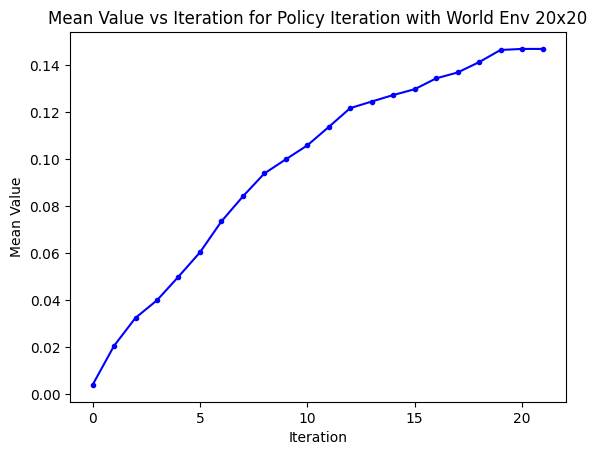

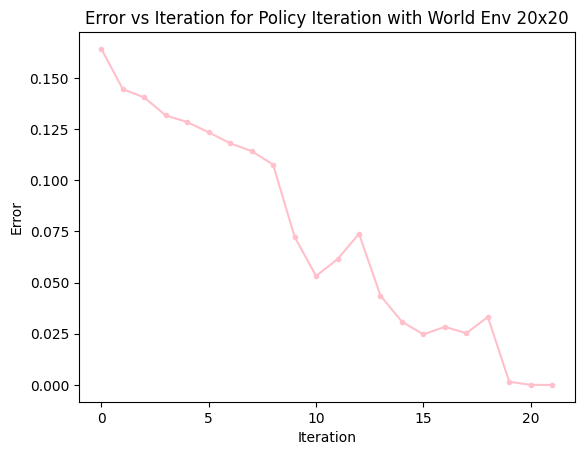

In [34]:
pi = mdp.PolicyIteration(P, R, 0.99, eval_type=1, max_iter=10000)
pi.run()
plot_policy(random_map, pi.policy, f'Policy Iteration_{state_size}')
graph_time("Policy Iteration", pi.run_stats)
graph_reward("Policy Iteration", pi.run_stats)
graph_meanV("Policy Iteration", pi.run_stats)
graph_error("Policy Iteration", pi.run_stats)


In [37]:
print(pi.policy == vi.policy)
print(pi.policy)
print(vi.policy)
print(len(vi.policy))

False
(3, 3, 3, 0, 3, 3, 0, 0, 0, 2, 3, 3, 3, 0, 3, 3, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 3, 3, 1, 0, 0, 0, 0, 1, 0, 1, 3, 3, 0, 0, 0, 2, 1, 3, 0, 0, 0, 0, 2, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 3, 2, 2, 2, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2, 3, 0, 0, 2, 2, 2, 1, 0, 0, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1, 2, 0, 0, 1, 3, 3, 3, 2, 3, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 3, 3, 1, 0, 0, 0, 0, 1, 0, 1, 3, 3, 0, 0, 0, 2, 1, 3, 0, 0, 0, 0, 2, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 2, 1, 3, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 

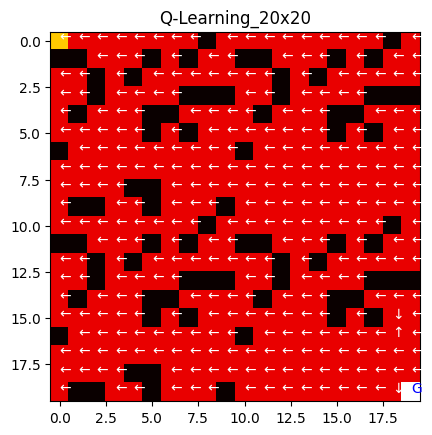

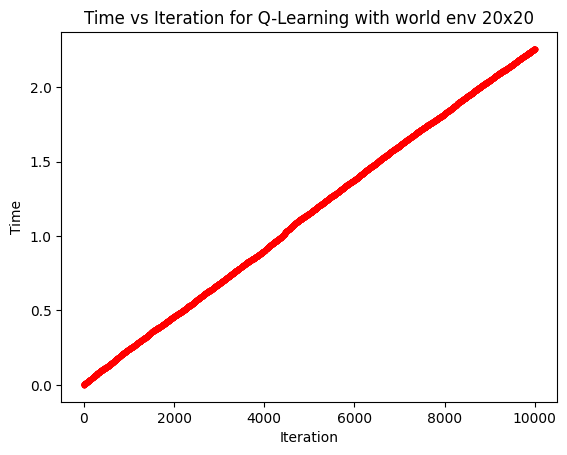

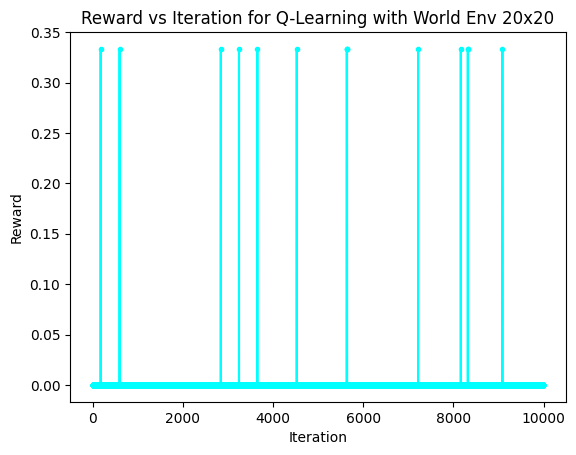

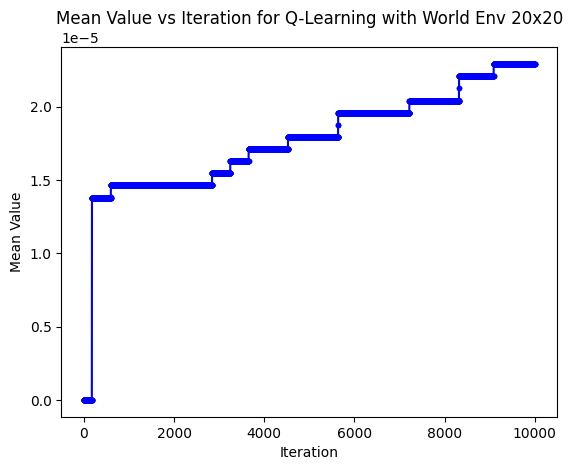

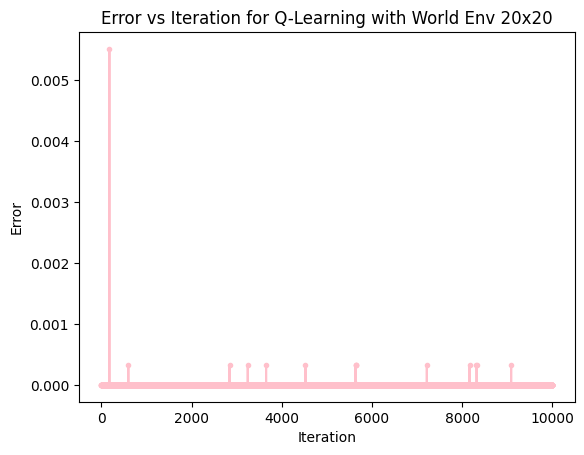

In [57]:
def goal_stats(map):
    stas = []
    for i in range(len(map)):
        for j in range(len(map)):
            if map[i][j] in ('H', 'G'):
                stas.append(i * len(map) + j)
    return stas

def search_new_episode(old_s, action, new_s):
    if new_s in goal_stats(random_map):
        return True
    return False

ql = mdp.QLearning(P, R, 0.99, iter_callback=search_new_episode)
ql.run()

plot_policy(random_map, ql.policy, f'Q-Learning_{state_size}')
graph_time("Q-Learning", ql.run_stats)
graph_reward("Q-Learning", ql.run_stats)
graph_meanV("Q-Learning", ql.run_stats)
graph_error("Q-Learning", ql.run_stats)

# Using different Gamma (discount factor) values

In [39]:
import pandas as pd

gamma_values = [0.25, 0.45, 0.65, 0.85]
df_vi_all = []

for g in gamma_values:
    vi_new_gamma = mdp.ValueIteration(P, R, gamma=g)
    vi_new_gamma.run()
    df_vi_all.append(pd.DataFrame(vi_new_gamma.run_stats))


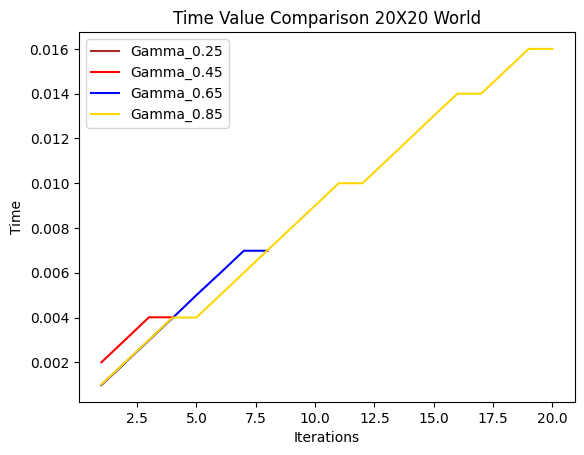

In [40]:

plt.plot(df_vi_all[0]['Iteration'], df_vi_all[0]['Time'], 'brown', label = "Gamma_0.25")
plt.plot(df_vi_all[1]['Iteration'], df_vi_all[1]['Time'], 'red', label = "Gamma_0.45")
plt.plot(df_vi_all[2]['Iteration'], df_vi_all[2]['Time'], 'blue', label = "Gamma_0.65")
plt.plot(df_vi_all[3]['Iteration'], df_vi_all[3]['Time'], 'gold', label = "Gamma_0.85")
plt.title('Time Value Comparison 20X20 World')
plt.xlabel('Iterations')   
plt.ylabel('Time')   
plt.legend()

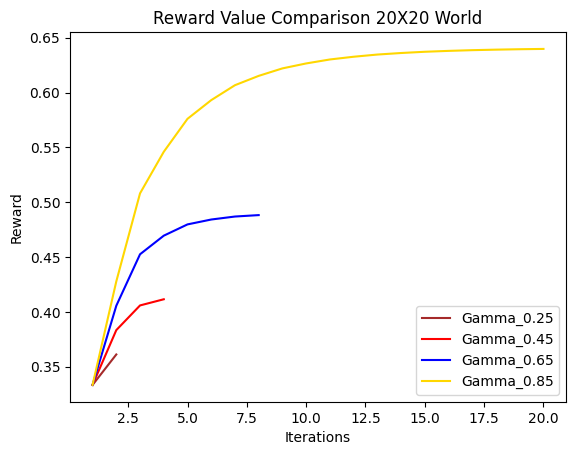

In [41]:
plt.plot(df_vi_all[0]['Iteration'], df_vi_all[0]['Reward'], 'brown', label = "Gamma_0.25")
plt.plot(df_vi_all[1]['Iteration'], df_vi_all[1]['Reward'], 'red', label = "Gamma_0.45")
plt.plot(df_vi_all[2]['Iteration'], df_vi_all[2]['Reward'], 'blue', label = "Gamma_0.65")
plt.plot(df_vi_all[3]['Iteration'], df_vi_all[3]['Reward'], 'gold', label = "Gamma_0.85")
plt.title('Reward Value Comparison 20X20 World')
plt.xlabel('Iterations')   
plt.ylabel('Reward')   
plt.legend()

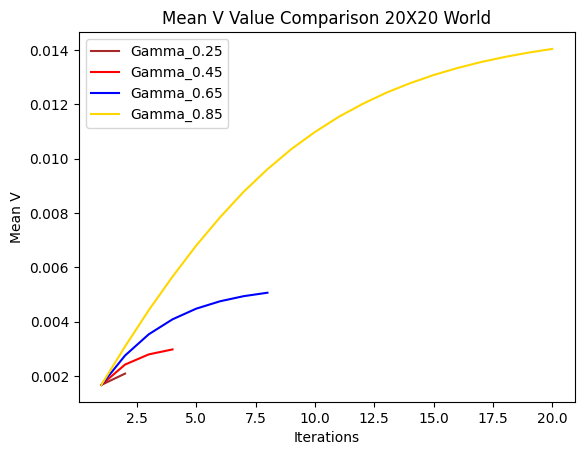

In [42]:
plt.plot(df_vi_all[0]['Iteration'], df_vi_all[0]['Mean V'], 'brown', label = "Gamma_0.25")
plt.plot(df_vi_all[1]['Iteration'], df_vi_all[1]['Mean V'], 'red', label = "Gamma_0.45")
plt.plot(df_vi_all[2]['Iteration'], df_vi_all[2]['Mean V'], 'blue', label = "Gamma_0.65")
plt.plot(df_vi_all[3]['Iteration'], df_vi_all[3]['Mean V'], 'gold', label = "Gamma_0.85")
plt.title('Mean V Value Comparison 20X20 World')
plt.xlabel('Iterations')   
plt.ylabel('Mean V')   
plt.legend()

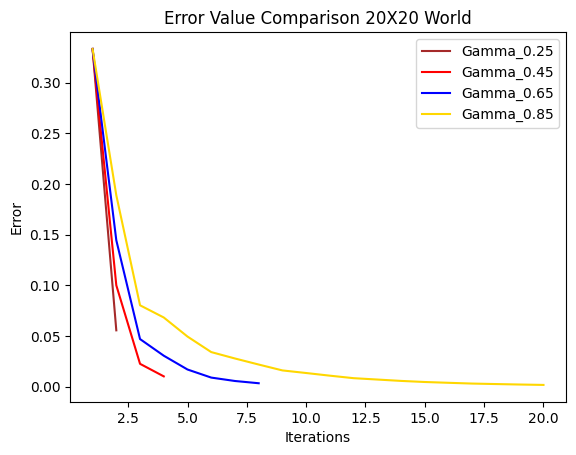

In [43]:
plt.plot(df_vi_all[0]['Iteration'], df_vi_all[0]['Error'], 'brown', label = "Gamma_0.25")
plt.plot(df_vi_all[1]['Iteration'], df_vi_all[1]['Error'], 'red', label = "Gamma_0.45")
plt.plot(df_vi_all[2]['Iteration'], df_vi_all[2]['Error'], 'blue', label = "Gamma_0.65")
plt.plot(df_vi_all[3]['Iteration'], df_vi_all[3]['Error'], 'gold', label = "Gamma_0.85")
plt.title('Error Value Comparison 20X20 World')
plt.xlabel('Iterations')   
plt.ylabel('Error')   
plt.legend()

In [44]:
gamma_values = [0.25, 0.45, 0.65, 0.85]
df_pi_all = []

for g in gamma_values:
    pi_new_gamma = mdp.PolicyIteration(P, R, gamma=g)
    pi_new_gamma.run()
    df_pi_all.append(pd.DataFrame(pi_new_gamma.run_stats))

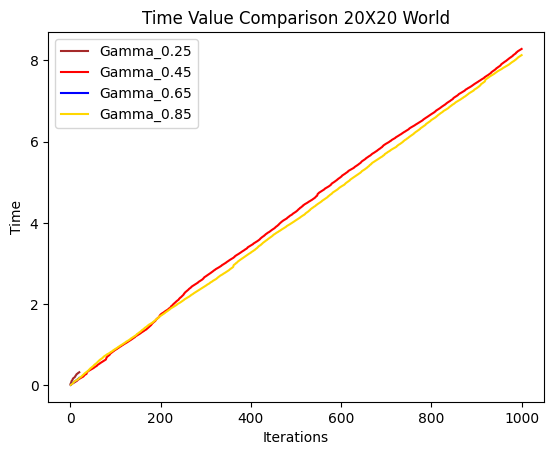

In [45]:
plt.plot(df_pi_all[0]['Iteration'], df_pi_all[0]['Time'], 'brown', label = "Gamma_0.25")
plt.plot(df_pi_all[1]['Iteration'], df_pi_all[1]['Time'], 'red', label = "Gamma_0.45")
plt.plot(df_pi_all[2]['Iteration'], df_pi_all[2]['Time'], 'blue', label = "Gamma_0.65")
plt.plot(df_pi_all[3]['Iteration'], df_pi_all[3]['Time'], 'gold', label = "Gamma_0.85")
plt.title('Time Value Comparison 20X20 World')
plt.xlabel('Iterations')   
plt.ylabel('Time')   
plt.legend()

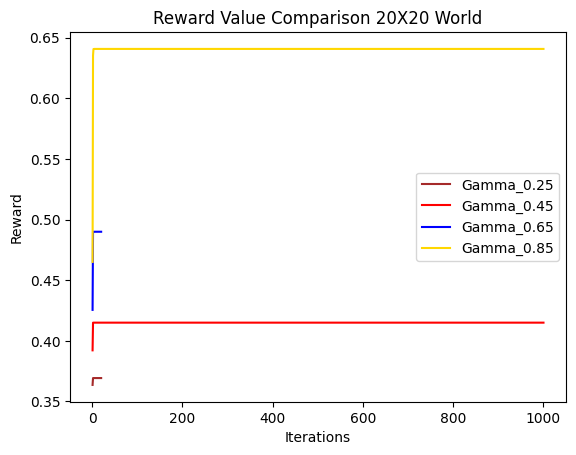

In [46]:
plt.plot(df_pi_all[0]['Iteration'], df_pi_all[0]['Reward'], 'brown', label = "Gamma_0.25")
plt.plot(df_pi_all[1]['Iteration'], df_pi_all[1]['Reward'], 'red', label = "Gamma_0.45")
plt.plot(df_pi_all[2]['Iteration'], df_pi_all[2]['Reward'], 'blue', label = "Gamma_0.65")
plt.plot(df_pi_all[3]['Iteration'], df_pi_all[3]['Reward'], 'gold', label = "Gamma_0.85")
plt.title('Reward Value Comparison 20X20 World')
plt.xlabel('Iterations')   
plt.ylabel('Reward')   
plt.legend()

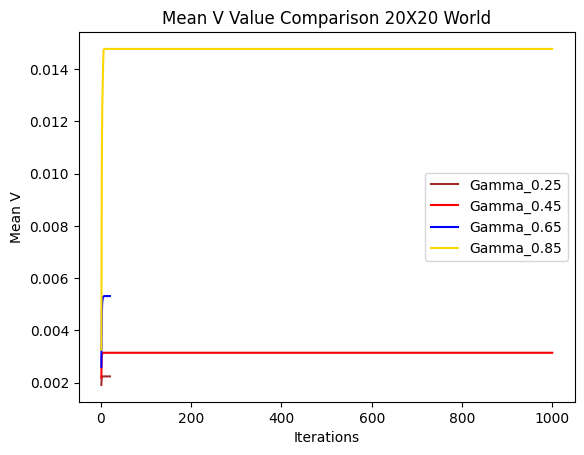

In [47]:
plt.plot(df_pi_all[0]['Iteration'], df_pi_all[0]['Mean V'], 'brown', label = "Gamma_0.25")
plt.plot(df_pi_all[1]['Iteration'], df_pi_all[1]['Mean V'], 'red', label = "Gamma_0.45")
plt.plot(df_pi_all[2]['Iteration'], df_pi_all[2]['Mean V'], 'blue', label = "Gamma_0.65")
plt.plot(df_pi_all[3]['Iteration'], df_pi_all[3]['Mean V'], 'gold', label = "Gamma_0.85")
plt.title('Mean V Value Comparison 20X20 World')
plt.xlabel('Iterations')   
plt.ylabel('Mean V')   
plt.legend()

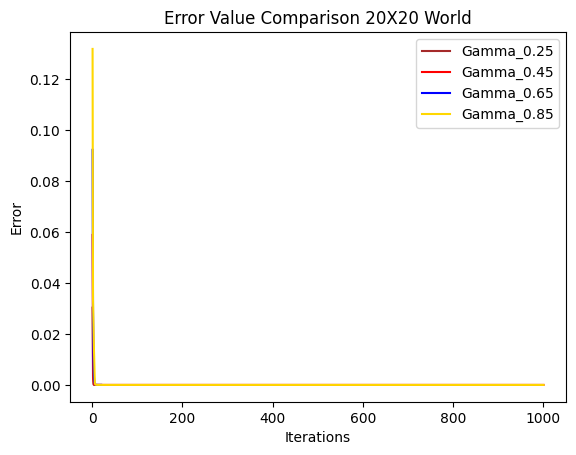

In [48]:
plt.plot(df_pi_all[0]['Iteration'], df_pi_all[0]['Error'], 'brown', label = "Gamma_0.25")
plt.plot(df_pi_all[1]['Iteration'], df_pi_all[1]['Error'], 'red', label = "Gamma_0.45")
plt.plot(df_pi_all[2]['Iteration'], df_pi_all[2]['Error'], 'blue', label = "Gamma_0.65")
plt.plot(df_pi_all[3]['Iteration'], df_pi_all[3]['Error'], 'gold', label = "Gamma_0.85")
plt.title('Error Value Comparison 20X20 World')
plt.xlabel('Iterations')   
plt.ylabel('Error')   
plt.legend()

In [49]:
gamma_values = [0.25, 0.45, 0.65, 0.85]
df_ql_all = []

for g in gamma_values:
    ql_new_gamma = mdp.QLearning(P, R, gamma=g, iter_callback=search_new_episode)
    ql_new_gamma.run()
    df_ql_all.append(pd.DataFrame(ql_new_gamma.run_stats))

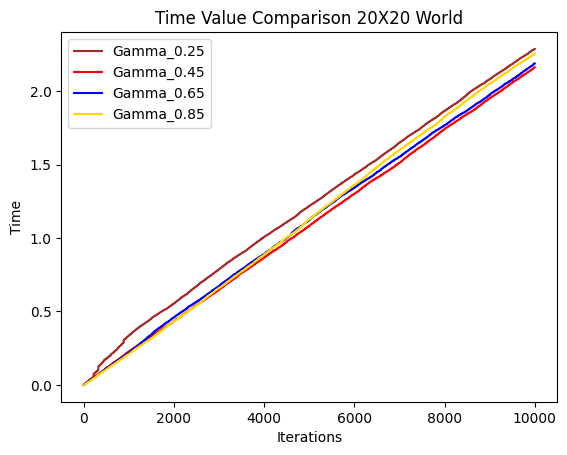

In [50]:
plt.plot(df_ql_all[0]['Iteration'], df_ql_all[0]['Time'], 'brown', label = "Gamma_0.25")
plt.plot(df_ql_all[1]['Iteration'], df_ql_all[1]['Time'], 'red', label = "Gamma_0.45")
plt.plot(df_ql_all[2]['Iteration'], df_ql_all[2]['Time'], 'blue', label = "Gamma_0.65")
plt.plot(df_ql_all[3]['Iteration'], df_ql_all[3]['Time'], 'gold', label = "Gamma_0.85")
plt.title('Time Value Comparison 20X20 World')
plt.xlabel('Iterations')   
plt.ylabel('Time')   
plt.legend()

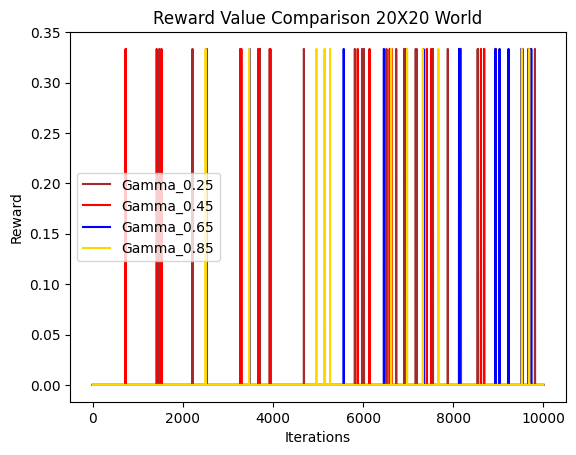

In [51]:
plt.plot(df_ql_all[0]['Iteration'], df_ql_all[0]['Reward'], 'brown', label = "Gamma_0.25")
plt.plot(df_ql_all[1]['Iteration'], df_ql_all[1]['Reward'], 'red', label = "Gamma_0.45")
plt.plot(df_ql_all[2]['Iteration'], df_ql_all[2]['Reward'], 'blue', label = "Gamma_0.65")
plt.plot(df_ql_all[3]['Iteration'], df_ql_all[3]['Reward'], 'gold', label = "Gamma_0.85")
plt.title('Reward Value Comparison 20X20 World')
plt.xlabel('Iterations')   
plt.ylabel('Reward')   
plt.legend()

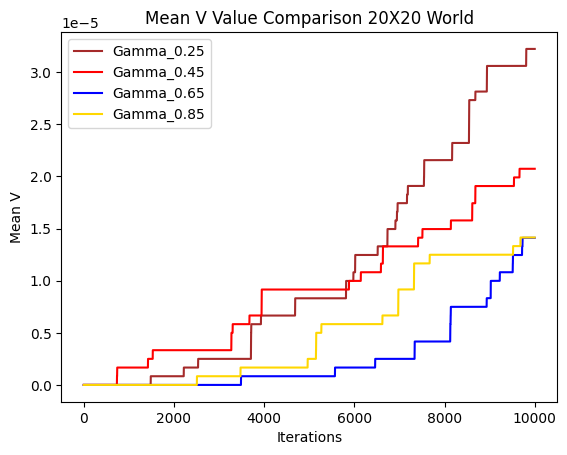

In [52]:
plt.plot(df_ql_all[0]['Iteration'], df_ql_all[0]['Mean V'], 'brown', label = "Gamma_0.25")
plt.plot(df_ql_all[1]['Iteration'], df_ql_all[1]['Mean V'], 'red', label = "Gamma_0.45")
plt.plot(df_ql_all[2]['Iteration'], df_ql_all[2]['Mean V'], 'blue', label = "Gamma_0.65")
plt.plot(df_ql_all[3]['Iteration'], df_ql_all[3]['Mean V'], 'gold', label = "Gamma_0.85")
plt.title('Mean V Value Comparison 20X20 World')
plt.xlabel('Iterations')   
plt.ylabel('Mean V')   
plt.legend()

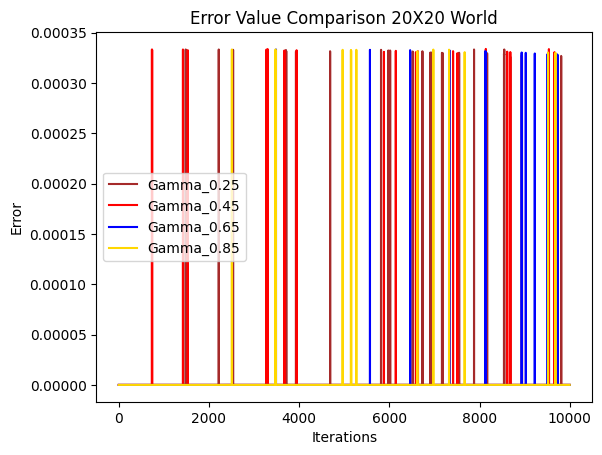

In [53]:
plt.plot(df_ql_all[0]['Iteration'], df_ql_all[0]['Error'], 'brown', label = "Gamma_0.25")
plt.plot(df_ql_all[1]['Iteration'], df_ql_all[1]['Error'], 'red', label = "Gamma_0.45")
plt.plot(df_ql_all[2]['Iteration'], df_ql_all[2]['Error'], 'blue', label = "Gamma_0.65")
plt.plot(df_ql_all[3]['Iteration'], df_ql_all[3]['Error'], 'gold', label = "Gamma_0.85")
plt.title('Error Value Comparison 20X20 World')
plt.xlabel('Iterations')   
plt.ylabel('Error')   
plt.legend()